<a href="https://colab.research.google.com/github/JohnnyBravo10/NBA-salary-prediction-/blob/main/data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import random
from random import randint
from random import seed
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.feature_selection import SelectKBest
import numpy as np


In [18]:
##loading dataset
dataframe = pd.read_csv("/nba_contracts_history.csv")
print(dataframe.shape)
dataframe




(199, 28)


,NAME,CONTRACT_START,CONTRACT_END,AVG_SALARY,AGE,GP,W,L,MIN,PTS,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,Wesley Matthews,2019,2020,2.564753e+06,32.0,69.0,27.0,42.0,2091.0,840.0,...,81.0,32.0,138.0,170.0,160.0,91.0,54.0,17.0,160.0,-90.0
1,Brook Lopez,2015,2017,2.116568e+07,27.0,72.0,34.0,38.0,2100.0,1236.0,...,81.4,214.0,321.0,535.0,50.0,104.0,43.0,126.0,206.0,-104.0
2,DeAndre Jordan,2011,2014,1.075976e+07,22.0,80.0,31.0,49.0,2047.0,566.0,...,45.2,207.0,368.0,575.0,42.0,101.0,41.0,142.0,255.0,-100.0
3,Markieff Morris,2015,2018,8.143324e+06,25.0,82.0,39.0,43.0,2581.0,1258.0,...,76.3,110.0,396.0,506.0,192.0,170.0,101.0,39.0,245.0,105.0
4,Dwight Howard,2018,2019,1.341074e+07,32.0,81.0,35.0,46.0,2463.0,1347.0,...,57.4,255.0,757.0,1012.0,105.0,208.0,48.0,131.0,249.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Brook Lopez,2012,2014,1.469367e+07,24.0,5.0,2.0,3.0,136.0,96.0,...,62.5,8.0,10.0,18.0,6.0,6.0,1.0,4.0,8.0,-27.0
195,Nikola Vucevic,2015,2018,1.200000e+07,24.0,74.0,21.0,53.0,2529.0,1428.0,...,75.2,238.0,572.0,810.0,147.0,148.0,54.0,54.0,220.0,-302.0
196,Aron Baynes,2015,2017,5.766667e+06,28.0,70.0,49.0,21.0,1122.0,461.0,...,86.5,109.0,209.0,318.0,35.0,65.0,16.0,22.0,162.0,136.0
197,Andre Iguodala,2013,2016,1.200000e+07,29.0,80.0,57.0,23.0,2779.0,1038.0,...,57.4,82.0,341.0,423.0,433.0,206.0,139.0,52.0,127.0,380.0


In [19]:
#checking for duplicates
dups=dataframe.duplicated()
print(dups.any())

print(dataframe[dups])
#turns out there's a duplicate
#delete duplicate rows
dataframe.drop_duplicates(inplace=True)
print(dataframe.shape)

True
           NAME  CONTRACT_START  CONTRACT_END  AVG_SALARY   AGE    GP    W  \
144  Quinn Cook            2017          2018    867391.5  24.0  14.0  9.0   

       L    MIN   PTS  ...   FT%  OREB  DREB  REB   AST   TOV  STL  BLK    PF  \
144  5.0  187.0  79.0  ...  40.0   1.0   6.0  7.0  26.0  13.0  4.0  0.0  13.0   

      +/-  
144 -41.0  

[1 rows x 28 columns]
(198, 28)


In [20]:
##learningset construction

learningSet= pd.DataFrame(dataframe.iloc[:,3:])
learningSet['Duration']=dataframe['CONTRACT_END']-dataframe['CONTRACT_START']
print(learningSet.shape)
learningSet



(198, 26)


,AVG_SALARY,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,...,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,Duration
0,2.564753e+06,32.0,69.0,27.0,42.0,2091.0,840.0,279.0,698.0,40.0,...,32.0,138.0,170.0,160.0,91.0,54.0,17.0,160.0,-90.0,1
1,2.116568e+07,27.0,72.0,34.0,38.0,2100.0,1236.0,506.0,987.0,51.3,...,214.0,321.0,535.0,50.0,104.0,43.0,126.0,206.0,-104.0,2
2,1.075976e+07,22.0,80.0,31.0,49.0,2047.0,566.0,234.0,341.0,68.6,...,207.0,368.0,575.0,42.0,101.0,41.0,142.0,255.0,-100.0,3
3,8.143324e+06,25.0,82.0,39.0,43.0,2581.0,1258.0,512.0,1100.0,46.5,...,110.0,396.0,506.0,192.0,170.0,101.0,39.0,245.0,105.0,3
4,1.341074e+07,32.0,81.0,35.0,46.0,2463.0,1347.0,506.0,911.0,55.5,...,255.0,757.0,1012.0,105.0,208.0,48.0,131.0,249.0,89.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,1.469367e+07,24.0,5.0,2.0,3.0,136.0,96.0,38.0,77.0,49.4,...,8.0,10.0,18.0,6.0,6.0,1.0,4.0,8.0,-27.0,2
195,1.200000e+07,24.0,74.0,21.0,53.0,2529.0,1428.0,631.0,1206.0,52.3,...,238.0,572.0,810.0,147.0,148.0,54.0,54.0,220.0,-302.0,3
196,5.766667e+06,28.0,70.0,49.0,21.0,1122.0,461.0,185.0,327.0,56.6,...,109.0,209.0,318.0,35.0,65.0,16.0,22.0,162.0,136.0,2
197,1.200000e+07,29.0,80.0,57.0,23.0,2779.0,1038.0,396.0,879.0,45.1,...,82.0,341.0,423.0,433.0,206.0,139.0,52.0,127.0,380.0,3


In [21]:
##checking if there are missing values

print(learningSet.isna().any().any())

##there aren't any missing values

False


In [22]:
#normalizing learningSet (min-max)
normalizedLearningSet= learningSet.copy()


for feature_name in normalizedLearningSet.iloc[:,1:].columns:
    max_value = learningSet[feature_name].max()
    min_value = learningSet[feature_name].min()
    normalizedLearningSet[feature_name] = (normalizedLearningSet[feature_name] - min_value) / (max_value - min_value)

normalizedLearningSet

,AVG_SALARY,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,...,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,Duration
0,2.564753e+06,0.7500,0.839506,0.421875,0.677419,0.668908,0.353535,0.375505,0.424482,0.400,...,0.080605,0.165459,0.137959,0.190703,0.243316,0.319527,0.063197,0.548276,0.366735,0.000000
1,2.116568e+07,0.4375,0.876543,0.531250,0.612903,0.671790,0.520202,0.681023,0.600487,0.513,...,0.539043,0.386473,0.435918,0.059595,0.278075,0.254438,0.468401,0.706897,0.357192,0.333333
2,1.075976e+07,0.1250,0.975309,0.484375,0.790323,0.654819,0.238215,0.314939,0.207065,0.686,...,0.521411,0.443237,0.468571,0.050060,0.270053,0.242604,0.527881,0.875862,0.359918,0.666667
3,8.143324e+06,0.3125,1.000000,0.609375,0.693548,0.825809,0.529461,0.689098,0.669306,0.465,...,0.277078,0.477053,0.412245,0.228844,0.454545,0.597633,0.144981,0.841379,0.499659,0.666667
4,1.341074e+07,0.7500,0.987654,0.546875,0.741935,0.788024,0.566919,0.681023,0.554202,0.555,...,0.642317,0.913043,0.825306,0.125149,0.556150,0.284024,0.486989,0.855172,0.488753,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,1.469367e+07,0.2500,0.049383,0.031250,0.048387,0.042907,0.040404,0.051144,0.046285,0.494,...,0.020151,0.010870,0.013878,0.007151,0.016043,0.005917,0.014870,0.024138,0.409680,0.333333
195,1.200000e+07,0.2500,0.901235,0.328125,0.854839,0.809158,0.601010,0.849260,0.733861,0.523,...,0.599496,0.689614,0.660408,0.175209,0.395722,0.319527,0.200743,0.755172,0.222222,0.666667
196,5.766667e+06,0.5000,0.851852,0.765625,0.338710,0.358630,0.194024,0.248991,0.198538,0.566,...,0.274559,0.251208,0.258776,0.041716,0.173797,0.094675,0.081784,0.555172,0.520791,0.333333
197,1.200000e+07,0.5625,0.975309,0.890625,0.370968,0.889209,0.436869,0.532974,0.534714,0.451,...,0.206549,0.410628,0.344490,0.516091,0.550802,0.822485,0.193309,0.434483,0.687117,0.666667


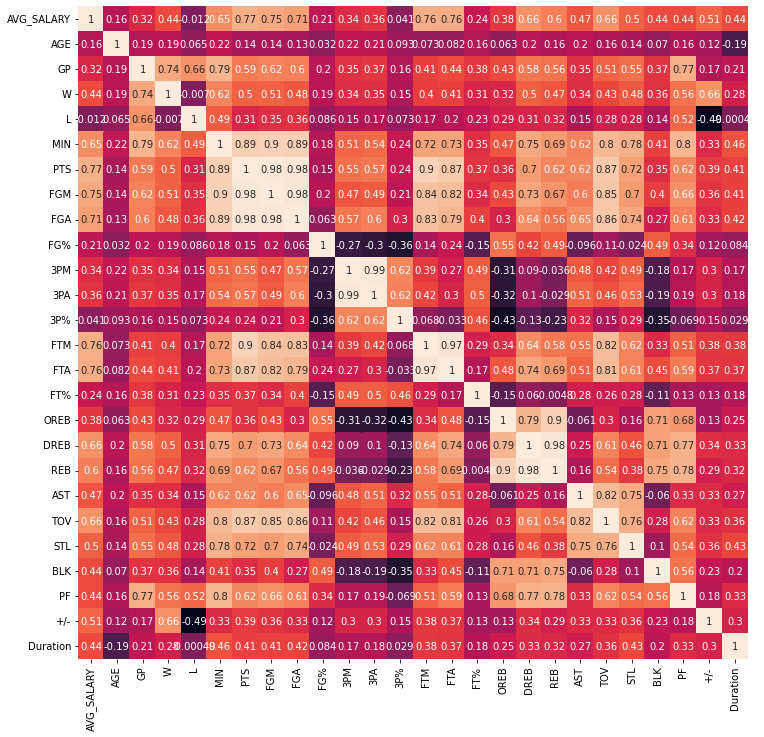

In [10]:
#correlations
plt.figure(figsize=(12, 12))
sns.heatmap(learningSet.corr(), annot=True, cbar=False)

plt.show()

In [11]:
#first model developing
x= normalizedLearningSet.iloc[:,1:]
y= normalizedLearningSet.iloc[:,0]

# dictionary of model names and model objects
def get_models():
 models = dict()
 models['Linear'] = LinearRegression()
 models['TheilSen'] = TheilSenRegressor(n_subsamples=100, max_iter=1000)
 return models

# evaluate a model
def evalute_model(X, y, model, name):
 # define model evaluation method
 cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 # evaluate model
 scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_percentage_error', cv=10, n_jobs=-1)
 # force scores to be positive
 scores = absolute(scores)
 return scores

# retrieve models
models = get_models()
results = dict()
for name, model in models.items():
 # evaluate the model
 results[name] = evalute_model(x, y, model, name)
 # summarize progress
 print('>%s %.3f (%.3f)' % (name, mean(results[name]), std(results[name])))

>Linear 0.551 (0.137)
>TheilSen 0.552 (0.136)


In [23]:
#tentativo di prendere in considerazione anche anno inizio contratto
withContractBeginyear= normalizedLearningSet.copy()
withContractBeginyear['beginYear']=dataframe['CONTRACT_START']
print(withContractBeginyear.shape)

#second model developing
x2= withContractBeginyear.iloc[:,1:]
y2= withContractBeginyear.iloc[:,0]

# retrieve models
models = get_models()
results = dict()
for name, model in models.items():
 # evaluate the model
 results[name] = evalute_model(x2, y2, model, name)
 # summarize progress
 print('>%s %.3f (%.3f)' % (name, mean(results[name]), std(results[name])))

(198, 27)
>Linear 0.577 (0.152)
>TheilSen 0.578 (0.151)


LE PRESTAZIONI NON MIGLIORANO CONSIDERANDO L'ANNO DI INIZIO DEL CONTRATTTO

In [24]:
#tentativo rimuovendo dal learning set le variabili dipendenti da altre (esempio: REB=OREB+DREB)

withoutDependents= normalizedLearningSet.iloc[:,[0,1,3,4,5,7,8,10,11,13,14,16,17,19,20,21,22,23,24,25]].copy() 

print(withoutDependents)

#third model developing
x3= withoutDependents.iloc[:,1:]
y3= withoutDependents.iloc[:,0]

# retrieve models
models = get_models()
results = dict()
for name, model in models.items():
 # evaluate the model
 results[name] = evalute_model(x3, y3, model, name)
 # summarize progress
 print('>%s %.3f (%.3f)' % (name, mean(results[name]), std(results[name])))





       AVG_SALARY     AGE         W         L       MIN       FGM       FGA  \
0    2.564753e+06  0.7500  0.421875  0.677419  0.668908  0.375505  0.424482   
1    2.116568e+07  0.4375  0.531250  0.612903  0.671790  0.681023  0.600487   
2    1.075976e+07  0.1250  0.484375  0.790323  0.654819  0.314939  0.207065   
3    8.143324e+06  0.3125  0.609375  0.693548  0.825809  0.689098  0.669306   
4    1.341074e+07  0.7500  0.546875  0.741935  0.788024  0.681023  0.554202   
..            ...     ...       ...       ...       ...       ...       ...   
194  1.469367e+07  0.2500  0.031250  0.048387  0.042907  0.051144  0.046285   
195  1.200000e+07  0.2500  0.328125  0.854839  0.809158  0.849260  0.733861   
196  5.766667e+06  0.5000  0.765625  0.338710  0.358630  0.248991  0.198538   
197  1.200000e+07  0.5625  0.890625  0.370968  0.889209  0.532974  0.534714   
198  1.640000e+07  0.3125  1.000000  0.241935  0.796670  0.456258  0.465286   

          3PM       3PA       FTM       FTA      OR

RESULTS HAVE IMPROVED! (A LITTLE BIT)

In [54]:
#tentativo considerando solo le feature più importanti

#fourth model delevlopment
x4= withoutDependents.iloc[:,1:].copy()
y4= withoutDependents.iloc[:,0].copy()

# define feature selection
fs = SelectKBest(k=15)


# apply feature selection
print(x4.shape)
x4_selected = pd.DataFrame(fs.fit_transform(x4, y4.values.ravel()),columns=np.array(['AGE','W','MIN','FGM','FGA','FTM','FTA','OREB','DREB','AST','TOV','STL','BLK','PF','Duration']))
##x4_selected.rename(columns={0:'AGE',1:'W',2:'MIN',3:'FGM',4:'FGA',5:'FTM',6:'FTA',7:'OREB',8:'DREB',9:'AST',10:'TOV',11:'STL',12:'BLK',13:'PF',14:'Duration'})
print(x4_selected)


# retrieve models
models = get_models()
results = dict()
for name, model in models.items():
 # evaluate the model
 results[name] = evalute_model(x4_selected, y4, model, name)
 # summarize progress
 print('>%s %.3f (%.3f)' % (name, mean(results[name]), std(results[name])))

(198, 19)
        AGE         W       MIN       FGM       FGA       FTM       FTA  \
0    0.7500  0.421875  0.668908  0.375505  0.424482  0.183333  0.194743   
1    0.4375  0.531250  0.671790  0.681023  0.600487  0.309722  0.327360   
2    0.1250  0.484375  0.654819  0.314939  0.207065  0.136111  0.259259   
3    0.3125  0.609375  0.825809  0.689098  0.669306  0.245833  0.277180   
4    0.7500  0.546875  0.788024  0.681023  0.554202  0.463889  0.695341   
..      ...       ...       ...       ...       ...       ...       ...   
193  0.2500  0.031250  0.042907  0.051144  0.046285  0.027778  0.038232   
194  0.2500  0.328125  0.809158  0.849260  0.733861  0.227778  0.260454   
195  0.5000  0.765625  0.358630  0.248991  0.198538  0.125000  0.124253   
196  0.5625  0.890625  0.889209  0.532974  0.534714  0.215278  0.322581   
197  0.3125  1.000000  0.796670  0.456258  0.465286  0.183333  0.238949   

         OREB      DREB       AST       TOV       STL       BLK        PF  \
0    0.08060

FOR K=15 RESULTS IMPROVE! (A LITTLE BIT)

FEATURES ESCLUSE: L, 3PM, 3PA, +/-

TENTATIVO DI NORMALIZZAZIONE ANCHE/ SOLO CON IL PARAMETRO normalize=True nel metodo LinearRegression() NON HA MIGLIORATO I RISULTATI

In [73]:
##def della prediction function

def firstPrediction(data):
  for column in data.columns:
    max_value = learningSet[column].max()
    min_value = learningSet[column].min()
    data[feature_name] = (data[feature_name] - min_value) / (max_value - min_value)
  return TheilSenRegressor(n_subsamples=100, max_iter=1000).fit(x4_selected, y4).predict(data)


##consiglio per creare il dataframe di input
a=pd.DataFrame(np.array([[40, 60, 250, 55, 60, 1000, 200, 300,30,300,100,300,300,120,2]]),columns=x4_selected.columns)
print(firstPrediction(a))


[1.27140541e+10]
